## Section 1. Importing Libraries

In [2]:
import os
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Section 2. Studying the Data

In [4]:
# import the data
data_path = 'TCGAdata.txt'
data_df = pd.read_csv(data_path, sep=" " ,header=0)

#import the labels
labels_path = 'TCGAlabels'
labels_df = pd.read_csv(labels_path, sep=" " ,header=0)

In [10]:
data_df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V1991,V1992,V1993,V1994,V1995,V1996,V1997,V1998,V1999,V2000
count,2887.000000,2887.000000,2887.000000,2887.000000,2887.000000,2887.000000,2887.000000,2887.000000,2887.000000,2887.000000,...,2887.000000,2887.000000,2887.000000,2887.000000,2887.000000,2887.000000,2887.000000,2887.000000,2887.000000,2887.000000
mean,-0.029781,-0.148931,2.839441,0.006945,-0.180715,0.939759,0.245807,0.285621,0.000179,-0.059931,...,0.440345,0.067981,0.001196,0.321597,-0.056884,0.167196,-0.279428,-0.080986,-0.283972,-0.046164
std,0.663438,1.159077,5.622636,0.362750,0.808052,1.873342,1.649150,0.699751,0.083215,0.820174,...,1.583450,0.502476,0.621258,2.937240,0.591996,1.479922,1.839033,1.436563,1.168836,0.558402
min,-3.368203,-5.276244,-1.534537,-1.921428,-3.124044,-5.374573,-5.574726,-2.461941,-0.010137,-0.198581,...,-5.774299,-1.491515,-2.471626,-3.209894,-3.281130,-1.676247,-5.115300,-1.103947,-1.109631,-2.024150
25%,-0.397303,-0.898694,-1.534537,-0.204978,-0.699494,-0.077973,-0.945676,-0.153691,-0.010137,-0.198581,...,-0.647499,-0.247665,-0.371226,-2.192344,-0.401580,-0.956747,-1.598650,-1.103947,-1.109631,-0.420100
50%,0.042297,-0.120044,-0.741137,-0.012428,-0.294644,1.361427,0.048374,0.357959,-0.010137,-0.198581,...,0.325901,0.016385,0.021674,-0.339494,-0.001130,-0.113347,-0.474900,-1.103947,-0.807031,-0.027850
75%,0.408897,0.652106,7.273213,0.208622,0.202956,2.289577,1.426424,0.757409,-0.010137,-0.198581,...,1.474351,0.312585,0.401524,2.470206,0.344020,0.976753,0.999150,0.731003,0.200469,0.316900
max,2.746697,3.206256,19.443863,2.189672,4.924556,5.419627,5.398774,3.628959,1.229563,10.051819,...,5.564301,3.466985,2.093174,10.773106,2.453570,6.371853,5.775800,12.596753,5.119469,2.236550


In [12]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2887 entries, 1 to 2887
Columns: 2000 entries, V1 to V2000
dtypes: float64(1985), int64(15)
memory usage: 44.1 MB


In [16]:
data_df.shape

(2887, 2000)

In [11]:
labels_df.describe()

,x
count,2887
unique,6
top,BC
freq,1215


In [19]:
labels_df.value_counts()

x  
BC     1215
KI      606
LU      571
OV      266
GBM     172
U        57
Name: count, dtype: int64

In [18]:
labels_df.value_counts(normalize = True)

x  
BC     0.420852
KI     0.209906
LU     0.197783
OV     0.092137
GBM    0.059577
U      0.019744
Name: proportion, dtype: float64

In [5]:
# Get the values from labels and data
X = data_df.values 
y = labels_df['x'].values


print("X", X.shape) # 2887 samples and 2000 features
print("y", y.shape) # 2887

X (2887, 2000)
y (2887,)


## Section 3. Preprocessing using PCA

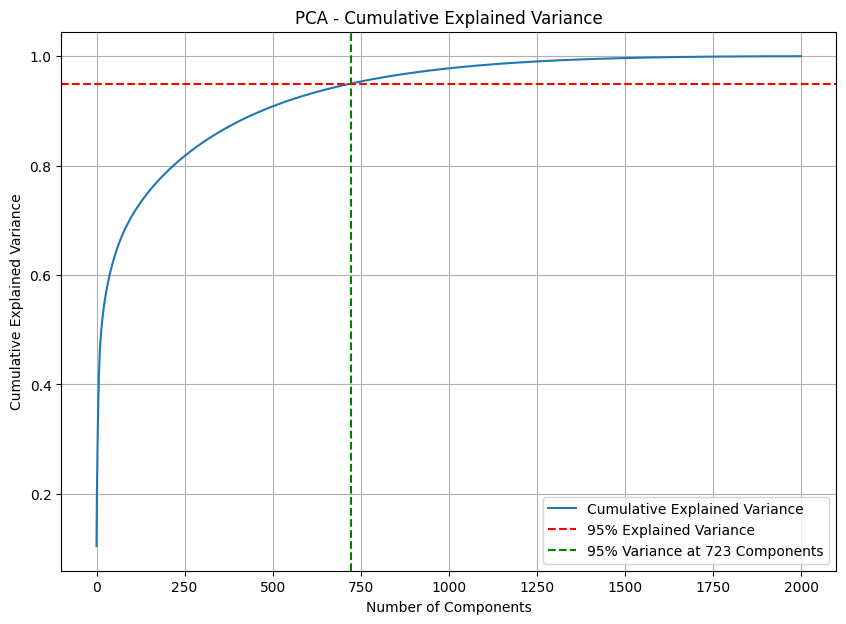

In [20]:
# Define PCA components to try based on the cumulative variance has been tested for different testing sizes training_sizes = [0.6, 0.7, 0.8]
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, stratify=y, random_state=42)
X_scaled = scaler.fit_transform(X_train)

# Fit PCA on the scaled data
pca = PCA().fit(X_scaled)

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components for 95% of explained variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1  # +1 since index starts from 0

# Plot the cumulative explained variance and the line at 95%
plt.figure(figsize=(10, 7))
plt.plot(cumulative_variance, label='Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.axvline(x=n_components_95, color='g', linestyle='--', label=f'95% Variance at {n_components_95} Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [21]:
# Based on the previous analysis the pca_components could be pca_components_to_try = [1, 10, 20, 30, 60, 120, 240, 480, 723]
# Where on different traning size the 723 components explain 95% of the variance.

pca_components_to_try = [1, 10, 20, 30, 60, 120, 240, 480, 723]

## Section 4. Model Training

In [22]:
# create 2 dictionaries 1 for the classifiers and the other for parameters
classifiers = {
    "KNN": KNeighborsClassifier(),
    # 42 ensure reproducibility
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(random_state=42)
}

classifier_params = {
    "KNN": {"knn__n_neighbors": [5, 21, 41, 81, 151, 301]},
    #Logis: smaller values specify stronger regularization
    "LogisticRegression": {"logisticregression__C": [0.001, 0.01, 0.1, 1, 10]},
    #Smaller values find a larger-margin separating hyperplane, 
    #Larger: prioritize a lower training error, smaller-margin 
    "SVM": {"svm__C": [0.1, 1], "svm__kernel": ["rbf"]}
}

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Training Size: 0.5
Classifier: KNN
Best Params: {'knn__n_neighbors': 5, 'pca__n_components': 60}
Best CV Score: 0.9896097654748173
Test Accuracy: 0.9916897506925207
Classification Report:
              precision    recall  f1-score   support

          BC       1.00      1.00      1.00       608
         GBM       0.98      0.98      0.98        86
          KI       1.00      0.99      0.99       303
          LU       1.00      1.00      1.00       286
          OV       0.99      0.99      0.99       133
           U       0.84      0.96      0.90        28

    accuracy                           0.99      1444
   macro avg       0.97      0.99      0.98      1444
weighted avg       0.99      0.99      0.99      1444

Confusion Matrix:
[[605   1   0   1   0   1]
 [  0  84   0   0   0   2]
 [  1   1 299   0   0   2]
 [  0   0   0 285   1   0]
 [  1   0   0   0 132   0]
 [  1   0   0   0   0  27]]
Fitting 5 folds for each o

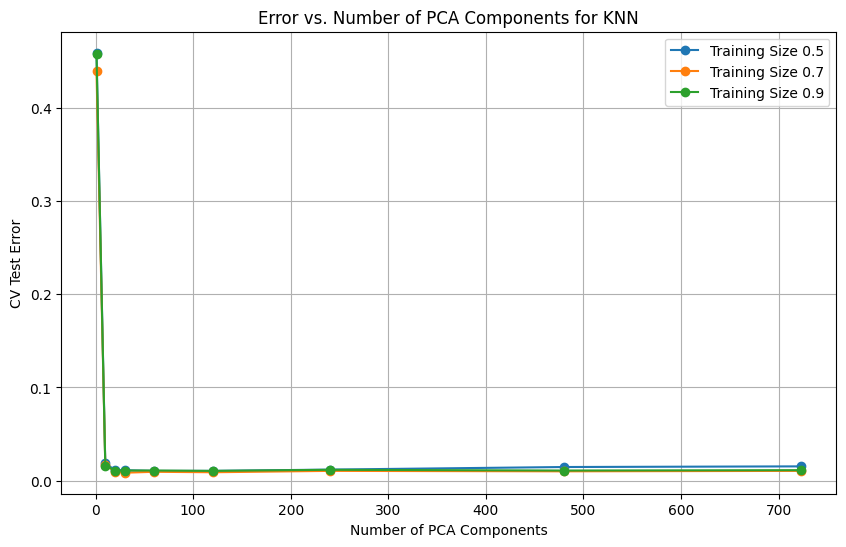

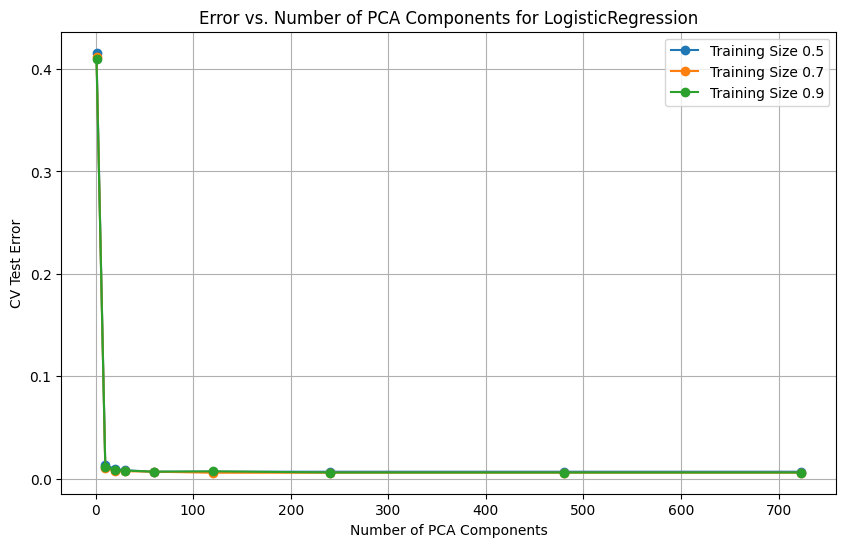

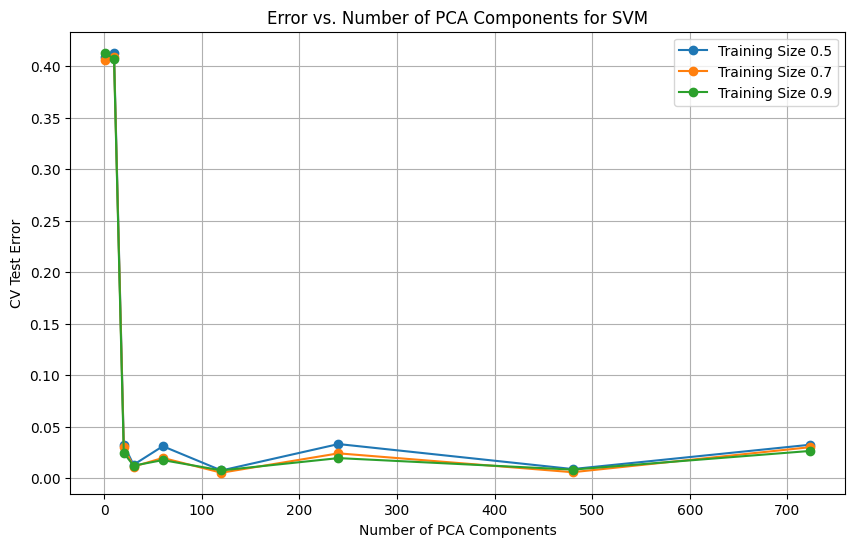

In [24]:
training_sizes = [0.5, 0.7, 0.9]  # Different training sizes

for name, classifier in classifiers.items():
    plt.figure(figsize=(10, 6))
    
    for size in training_sizes:
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=size, stratify=y, random_state=42)

        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('pca', PCA()), 
            (name.lower(), classifier)
        ])

        params = {
            'pca__n_components': pca_components_to_try,
            **classifier_params[name]
        }

        cv = GridSearchCV(pipeline, params, cv=5, scoring='accuracy', verbose=1, return_train_score=True, n_jobs=-1)
        cv.fit(X_train, y_train)

        error_rate = 1 - cv.cv_results_['mean_test_score'][:len(pca_components_to_try)]
        plt.plot(pca_components_to_try, error_rate, marker='o', label=f'Training Size {size}')

        # Model Evaluation on clean test data for each training size
        y_pred = cv.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_pred)
        print(f"Training Size: {size}")
        print(f"Classifier: {name}")
        print(f"Best Params: {cv.best_params_}")
        print(f"Best CV Score: {cv.best_score_}")
        print(f"Test Accuracy: {test_accuracy}")
        print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
        print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

    plt.xlabel('Number of PCA Components')
    plt.ylabel('CV Test Error')
    plt.title(f'Error vs. Number of PCA Components for {name}')
    plt.legend()
    plt.grid(True)

## Section 5. Detailed Results and Analysis

### 5.1. Detailed Results
Across all models, **Logistic Regression** performed exceptionally well with PCA components of **60** and **240**, achieving near-perfect to perfect accuracy scores. **KNN** and **SVM** also showed strong performance, especially with **120 PCA components**, indicating robustness across different training sizes.

### 5.2. Discussion
- **Performance vs. PCA Components**: Logistic Regression with **240 PCA components** achieved perfect accuracy in the **90% training size** scenario, suggesting excellent generalization. KNN required fewer components (**30 or 120**) to achieve high accuracy, which may indicate a strong local structure in the data that KNN can exploit.
- **Unexpected Results**: Despite high dimensionality and potential overfitting risks, all classifiers managed high accuracy, possibly due to effective regularization (in Logistic Regression and SVM) and dimensionality reduction through PCA.

### 5.3. Conclusion
- **Key Findings**: Logistic Regression and SVM, with adequate regularization and appropriate PCA component selection, can handle high-dimensional data effectively, as evidenced by their performance on the cancer classification task.
- **Future Work**: Further investigations into the impact of PCA components beyond **723** and exploring more granular hyperparameter tuning could potentially enhance model performance and robustness.


## Section 6. Introducing Noise to the Model for Robustness

In [26]:
def introduce_label_noise(labels, noise_level):
    """
    Introduce label noise into the dataset for categorical labels.
    `labels` is the array of true labels.
    `noise_level` is the fraction of labels to be flipped.
    """
    labels = np.array(labels)
    n_total = labels.shape[0] # The total number of labels
    n_noise = int(noise_level * n_total) 
    noise_indices = np.random.choice(n_total, n_noise, replace=False)
    
    unique_classes = np.unique(labels)
    noisy_labels = labels.copy() # a copy of the original labels to modify,
    
    for idx in noise_indices:
        current_class = noisy_labels[idx]
        possible_classes = unique_classes[unique_classes != current_class]
        noisy_labels[idx] = np.random.choice(possible_classes)

    return noisy_labels



--- Noise Level: 25.0% ---
Fitting 5 folds for each of 54 candidates, totalling 270 fits

Training Size: 0.5
Classifier: KNN
Best Params: {'knn__n_neighbors': 21, 'pca__n_components': 20}
Best CV Score: 0.7394463667820069
Test Accuracy: 0.9909972299168975
Classification Report:
              precision    recall  f1-score   support

          BC       0.99      1.00      0.99       608
         GBM       0.99      0.98      0.98        86
          KI       1.00      0.98      0.99       303
          LU       1.00      0.99      0.99       286
          OV       0.99      0.99      0.99       133
           U       0.87      0.96      0.92        28

    accuracy                           0.99      1444
   macro avg       0.97      0.98      0.98      1444
weighted avg       0.99      0.99      0.99      1444

Confusion Matrix:
[[607   0   0   0   0   1]
 [  0  84   0   0   0   2]
 [  2   1 298   1   0   1]
 [  2   0   0 283   1   0]
 [  1   0   0   0 132   0]
 [  1   0   0   0   0  2

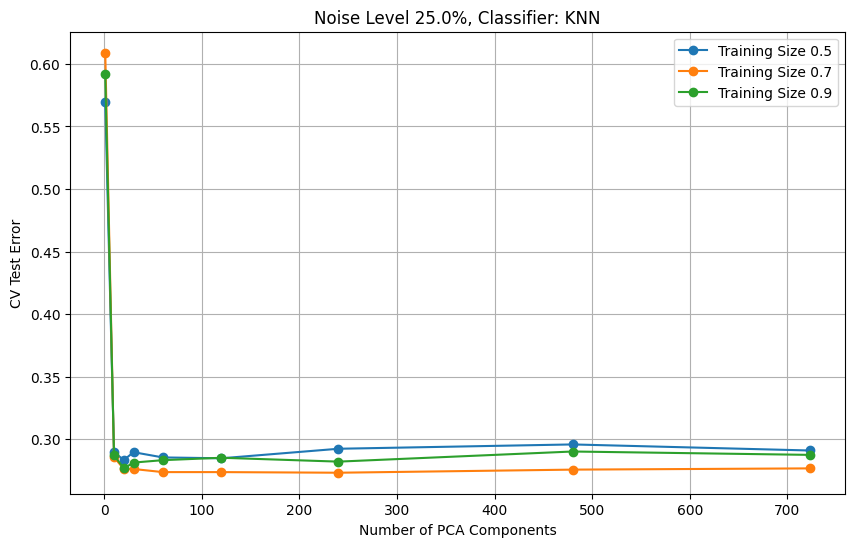

Fitting 5 folds for each of 45 candidates, totalling 225 fits

Training Size: 0.5
Classifier: LogisticRegression
Best Params: {'logisticregression__C': 0.001, 'pca__n_components': 60}
Best CV Score: 0.7415104767397155
Test Accuracy: 0.9903047091412742
Classification Report:
              precision    recall  f1-score   support

          BC       0.99      1.00      0.99       608
         GBM       1.00      0.97      0.98        86
          KI       1.00      0.98      0.99       303
          LU       0.99      0.99      0.99       286
          OV       0.99      1.00      1.00       133
           U       0.87      0.93      0.90        28

    accuracy                           0.99      1444
   macro avg       0.97      0.98      0.98      1444
weighted avg       0.99      0.99      0.99      1444

Confusion Matrix:
[[606   0   1   1   0   0]
 [  1  83   0   0   0   2]
 [  3   0 298   1   0   1]
 [  0   0   0 284   1   1]
 [  0   0   0   0 133   0]
 [  2   0   0   0   0  26]]
F

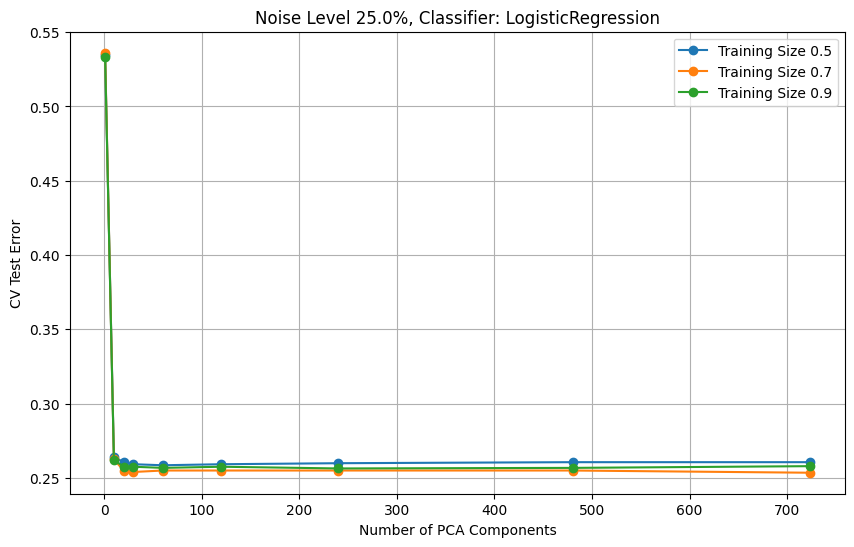

Fitting 5 folds for each of 18 candidates, totalling 90 fits

Training Size: 0.5
Classifier: SVM
Best Params: {'pca__n_components': 120, 'svm__C': 1, 'svm__kernel': 'rbf'}
Best CV Score: 0.7436034217608611
Test Accuracy: 0.9909972299168975
Classification Report:
              precision    recall  f1-score   support

          BC       0.99      1.00      0.99       608
         GBM       1.00      0.98      0.99        86
          KI       0.99      0.98      0.99       303
          LU       0.99      1.00      0.99       286
          OV       1.00      0.99      1.00       133
           U       0.90      0.96      0.93        28

    accuracy                           0.99      1444
   macro avg       0.98      0.98      0.98      1444
weighted avg       0.99      0.99      0.99      1444

Confusion Matrix:
[[606   0   1   1   0   0]
 [  0  84   0   0   0   2]
 [  5   0 297   1   0   0]
 [  0   0   0 285   0   1]
 [  0   0   1   0 132   0]
 [  1   0   0   0   0  27]]
Fitting 5 fol

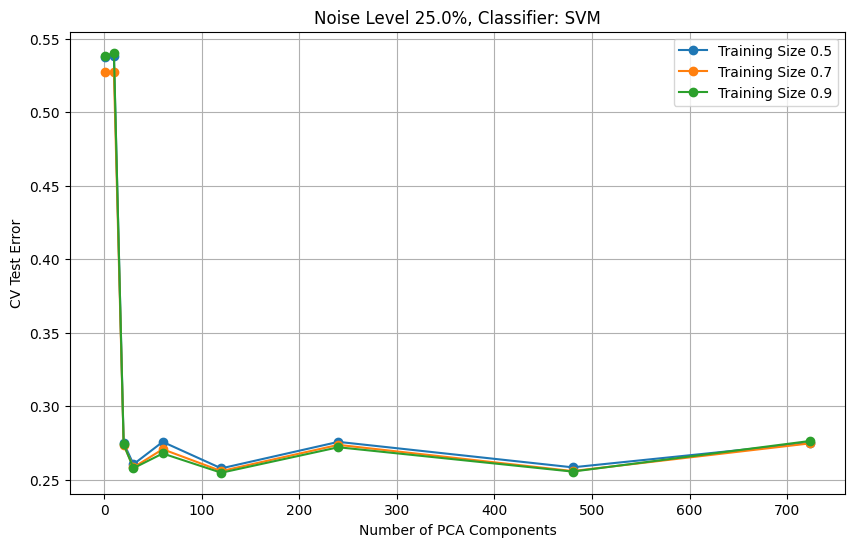


--- Noise Level: 50.0% ---
Fitting 5 folds for each of 54 candidates, totalling 270 fits

Training Size: 0.5
Classifier: KNN
Best Params: {'knn__n_neighbors': 21, 'pca__n_components': 20}
Best CV Score: 0.494129661668589
Test Accuracy: 0.9674515235457064
Classification Report:
              precision    recall  f1-score   support

          BC       0.98      0.97      0.98       608
         GBM       0.89      0.98      0.93        86
          KI       0.97      0.95      0.96       303
          LU       0.99      0.98      0.98       286
          OV       0.96      0.98      0.97       133
           U       0.74      0.82      0.78        28

    accuracy                           0.97      1444
   macro avg       0.92      0.95      0.93      1444
weighted avg       0.97      0.97      0.97      1444

Confusion Matrix:
[[591   9   5   0   0   3]
 [  0  84   0   0   0   2]
 [  7   0 288   3   2   3]
 [  2   1   2 280   1   0]
 [  1   0   0   1 131   0]
 [  2   0   1   0   2  23

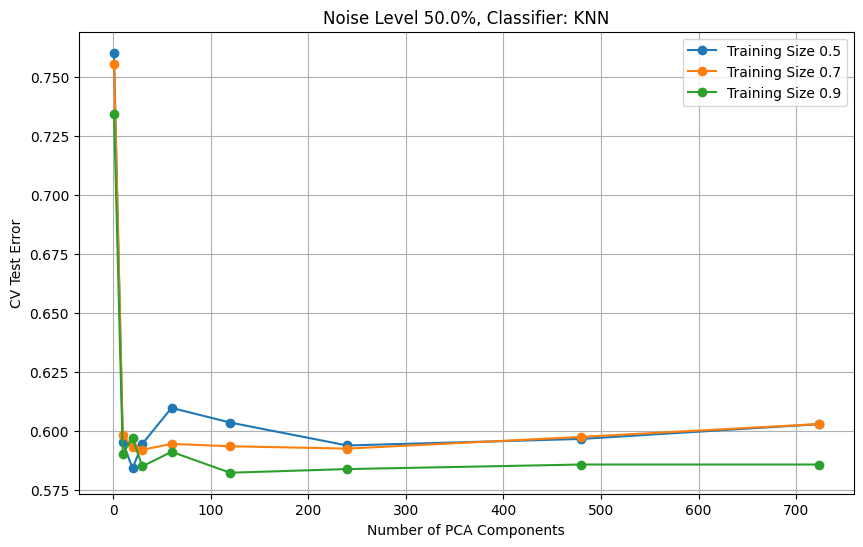

Fitting 5 folds for each of 45 candidates, totalling 225 fits

Training Size: 0.5
Classifier: LogisticRegression
Best Params: {'logisticregression__C': 0.001, 'pca__n_components': 20}
Best CV Score: 0.49273356401384083
Test Accuracy: 0.9903047091412742
Classification Report:
              precision    recall  f1-score   support

          BC       1.00      0.99      1.00       608
         GBM       0.99      0.95      0.97        86
          KI       0.99      0.99      0.99       303
          LU       0.99      0.99      0.99       286
          OV       1.00      1.00      1.00       133
           U       0.76      0.93      0.84        28

    accuracy                           0.99      1444
   macro avg       0.96      0.98      0.97      1444
weighted avg       0.99      0.99      0.99      1444

Confusion Matrix:
[[604   1   1   0   0   2]
 [  0  82   0   1   0   3]
 [  0   0 301   1   0   1]
 [  0   0   0 284   0   2]
 [  0   0   0   0 133   0]
 [  0   0   1   1   0  26]]


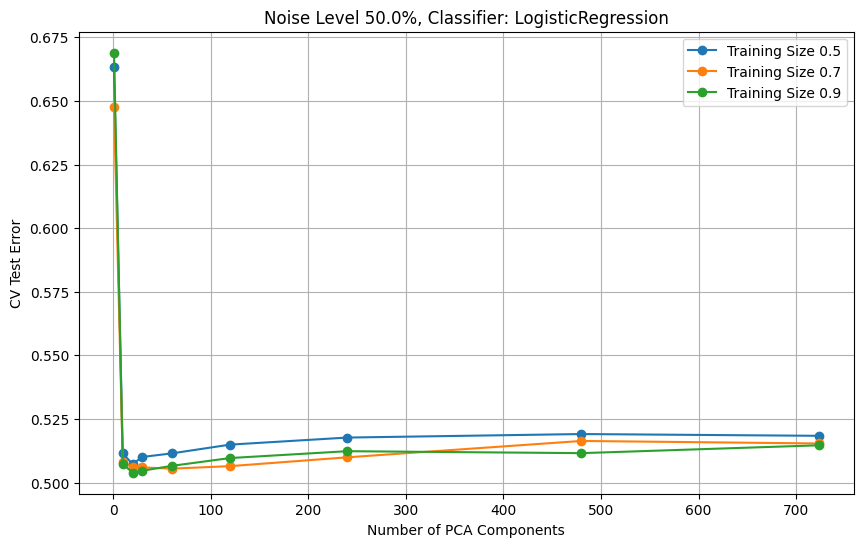

Fitting 5 folds for each of 18 candidates, totalling 90 fits

Training Size: 0.5
Classifier: SVM
Best Params: {'pca__n_components': 120, 'svm__C': 1, 'svm__kernel': 'rbf'}
Best CV Score: 0.49343041138023835
Test Accuracy: 0.9750692520775623
Classification Report:
              precision    recall  f1-score   support

          BC       0.96      1.00      0.98       608
         GBM       0.94      0.95      0.95        86
          KI       1.00      0.96      0.98       303
          LU       0.99      0.99      0.99       286
          OV       0.98      0.97      0.98       133
           U       1.00      0.61      0.76        28

    accuracy                           0.98      1444
   macro avg       0.98      0.91      0.94      1444
weighted avg       0.98      0.98      0.97      1444

Confusion Matrix:
[[607   0   0   1   0   0]
 [  4  82   0   0   0   0]
 [  5   5 290   2   1   0]
 [  3   0   0 283   0   0]
 [  4   0   0   0 129   0]
 [ 10   0   0   0   1  17]]
Fitting 5 fo

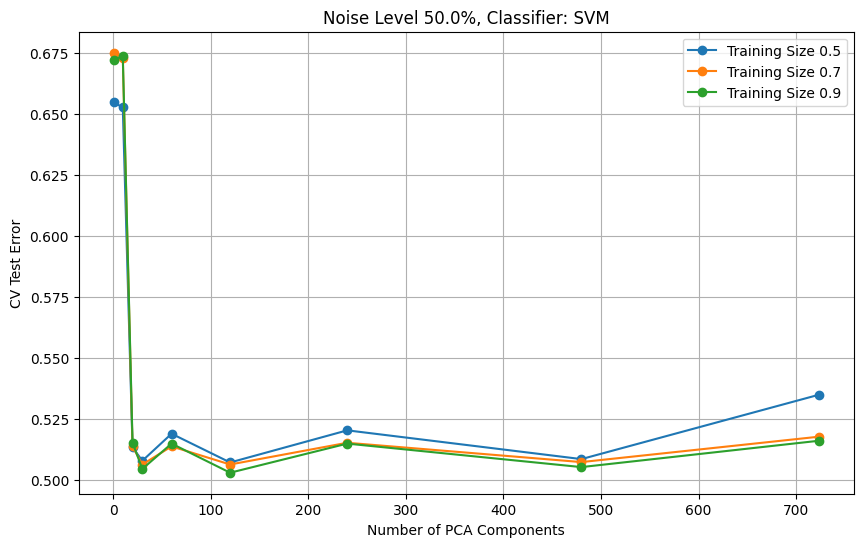


--- Noise Level: 75.0% ---
Fitting 5 folds for each of 54 candidates, totalling 270 fits

Training Size: 0.5
Classifier: KNN
Best Params: {'knn__n_neighbors': 151, 'pca__n_components': 30}
Best CV Score: 0.239801999231065
Test Accuracy: 0.796398891966759
Classification Report:
              precision    recall  f1-score   support

          BC       0.80      0.96      0.87       608
         GBM       0.19      0.22      0.20        86
          KI       0.94      0.95      0.94       303
          LU       0.98      0.84      0.90       286
          OV       0.73      0.17      0.27       133
           U       0.03      0.04      0.03        28

    accuracy                           0.80      1444
   macro avg       0.61      0.53      0.54      1444
weighted avg       0.81      0.80      0.78      1444

Confusion Matrix:
[[582   5   4   2   2  13]
 [ 65  19   2   0   0   0]
 [  6   4 287   3   0   3]
 [ 21   6  13 239   6   1]
 [ 24  67   0   0  22  20]
 [ 26   1   0   0   0   1

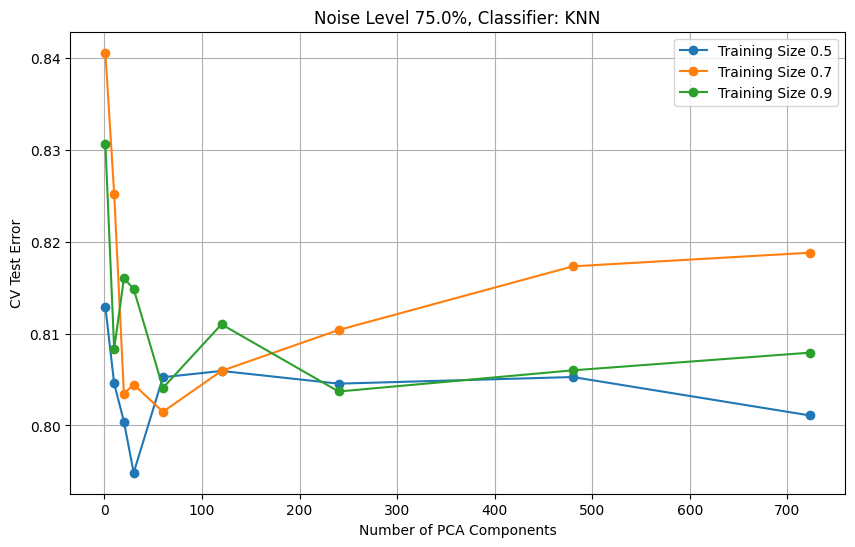

Fitting 5 folds for each of 45 candidates, totalling 225 fits

Training Size: 0.5
Classifier: LogisticRegression
Best Params: {'logisticregression__C': 0.01, 'pca__n_components': 20}
Best CV Score: 0.2196919454056132
Test Accuracy: 0.6502770083102493
Classification Report:
              precision    recall  f1-score   support

          BC       0.84      0.72      0.78       608
         GBM       0.33      0.95      0.49        86
          KI       0.72      0.53      0.61       303
          LU       0.87      0.61      0.71       286
          OV       0.57      0.63      0.60       133
           U       0.01      0.04      0.01        28

    accuracy                           0.65      1444
   macro avg       0.56      0.58      0.53      1444
weighted avg       0.75      0.65      0.68      1444

Confusion Matrix:
[[438  38   7  26  21  78]
 [  1  82   1   0   1   1]
 [ 25 111 160   0   2   5]
 [ 24  15  31 174  38   4]
 [ 29   0   1   0  84  19]
 [  3   0  22   1   1   1]]
Fi

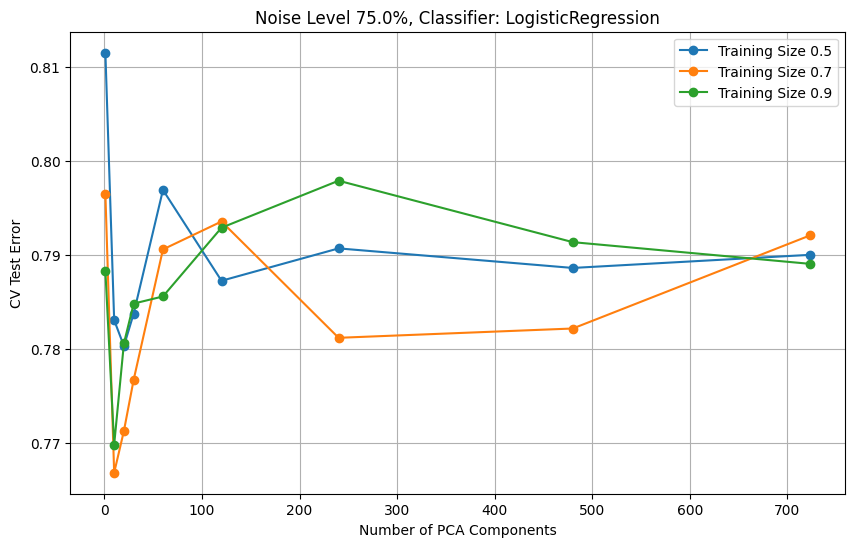

Fitting 5 folds for each of 18 candidates, totalling 90 fits

Training Size: 0.5
Classifier: SVM
Best Params: {'pca__n_components': 480, 'svm__C': 1, 'svm__kernel': 'rbf'}
Best CV Score: 0.23146626297577858
Test Accuracy: 0.8074792243767313
Classification Report:
              precision    recall  f1-score   support

          BC       0.88      0.88      0.88       608
         GBM       0.48      0.97      0.64        86
          KI       0.97      0.69      0.81       303
          LU       0.93      0.89      0.91       286
          OV       0.55      0.59      0.57       133
           U       0.15      0.14      0.15        28

    accuracy                           0.81      1444
   macro avg       0.66      0.69      0.66      1444
weighted avg       0.84      0.81      0.81      1444

Confusion Matrix:
[[536  14   0  13  39   6]
 [  0  83   0   0   3   0]
 [ 19  40 210   1  22  11]
 [ 16   9   6 255   0   0]
 [ 20  23   1   5  78   6]
 [ 20   4   0   0   0   4]]
Fitting 5 fo

C:\Users\salma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\salma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\salma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Training Size: 0.9
Classifier: SVM
Best Params: {'pca__n_components': 10, 'svm__C': 1, 'svm__kernel': 'rbf'}
Best CV Score: 0.23672595227508522
Test Accuracy: 0.8166089965397924
Classification Report:
              precision    recall  f1-score   support

          BC       0.87      0.85      0.86       121
         GBM       0.58      0.65      0.61        17
          KI       0.80      0.97      0.87        61
          LU       0.78      0.70      0.74        57
          OV       1.00      0.74      0.85        27
           U       0.43      0.50      0.46         6

    accuracy                           0.82       289
   macro avg       0.74      0.73      0.73       289
weighted avg       0.82      0.82      0.82       289

Confusion Matrix:
[[103   8   2   7   0   1]
 [  0  11   0   4   0   2]
 [  2   0  59   0   0   0]
 [  6   0  11  40   0   0]
 [  6   0   0   0  20   1]
 [  1   0   2   0   0   3]]


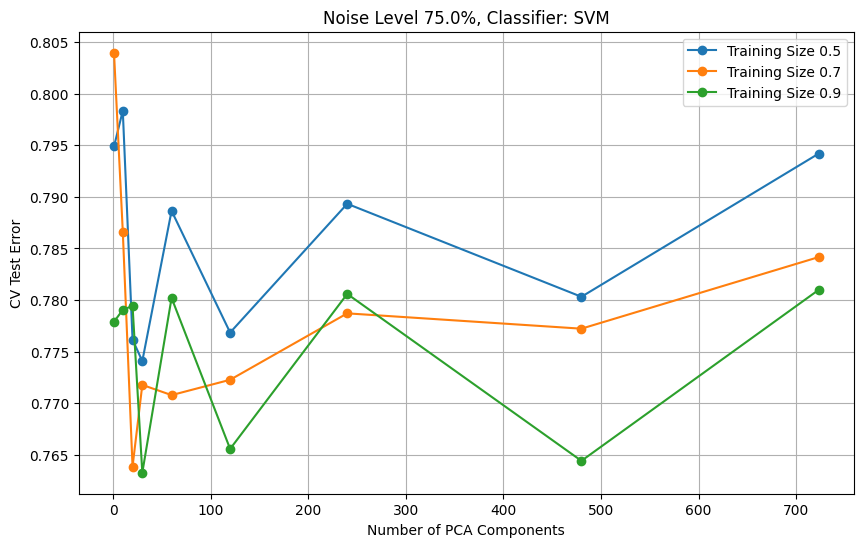

In [27]:
# Different noise levels
noise_levels = [0.25, 0.5, 0.75] # 25%, 50%, 75% of the data mislabeled

for noise_level in noise_levels:
    print(f"\n--- Noise Level: {noise_level*100}% ---")

    for name, classifier in classifiers.items():
        plt.figure(figsize=(10, 6))

        for size in training_sizes:
            X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=size, stratify=y, random_state=42)
            noisy_y_train = introduce_label_noise(y_train, noise_level)  

            pipeline = Pipeline([
                ('scaler', StandardScaler()),
                ('pca', PCA()),
                (name.lower(), classifier)
            ])

            params = {
                'pca__n_components': pca_components_to_try,
                **classifier_params[name]
            }

            cv = GridSearchCV(pipeline, params, cv=5, scoring='accuracy', verbose=1, return_train_score=True, n_jobs=-1)
            cv.fit(X_train, noisy_y_train)

            error_rate = 1 - cv.cv_results_['mean_test_score'][:len(pca_components_to_try)]
            plt.plot(pca_components_to_try, error_rate, marker='o', label=f'Training Size {size}')

            # Model Evaluation on clean test data for each training size within each noise level
            y_pred = cv.predict(X_test)
            test_accuracy = accuracy_score(y_test, y_pred)
            print(f"\nTraining Size: {size}")
            print(f"Classifier: {name}")
            print(f"Best Params: {cv.best_params_}")
            print(f"Best CV Score: {cv.best_score_}")
            print(f"Test Accuracy: {test_accuracy}")
            print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
            print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

        plt.xlabel('Number of PCA Components')
        plt.ylabel('CV Test Error')
        plt.title(f"Noise Level {noise_level*100}%, Classifier: {name}")
        plt.legend()
        plt.grid(True)

## Section 7. Observing Feature Importances

In [13]:
# Checking for constant features
n_unique = data_df.nunique()
constant_features = n_unique[n_unique == 1].index
print("Constant features:", constant_features)

# Dropping constant features
data_df.drop(columns=constant_features, inplace=True)
X = data_df.values  # update X after dropping constant features

Constant features: Index(['V84', 'V402', 'V498', 'V597', 'V643', 'V733', 'V800', 'V817', 'V864',
       'V985', 'V1111', 'V1181', 'V1276', 'V1374', 'V1558', 'V1853', 'V1883'],
      dtype='object')


In [14]:
# Stratified split to maintain the same class proportion in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42, stratify=y)

# Assuming the constant features have been removed and we want to use ANOVA F-test
selector = SelectKBest(score_func=f_classif, k = 20)
X_new = selector.fit_transform(X_train, y_train)

# Let's print the F-scores and P-values
print("F-scores:", selector.scores_)
print("P-values:", selector.pvalues_)

F-scores: [ 50.76845609 117.74615441 767.95468005 ... 100.24522037 321.76314927
  22.16891225]
P-values: [1.11174428e-049 1.84623633e-109 0.00000000e+000 ... 1.38136126e-094
 1.20788903e-253 1.09373532e-021]


In [15]:
feature_names = data_df.columns

# Creating a DataFrame to view F-scores and p-values with feature names
feature_scores = pd.DataFrame({'Feature': feature_names, 'F-score': selector.scores_, 'P-value': selector.pvalues_})

# Sorting the features by F-score (descending)
sorted_features = feature_scores.sort_values(by='F-score', ascending=False)

# Displaying the top 50 features
print(sorted_features.head(50))

     Feature      F-score  P-value
17       V18  2424.338473      0.0
1918   V1936  2236.985755      0.0
1728   V1744  1994.673992      0.0
535     V539  1718.962260      0.0
622     V627  1624.200413      0.0
1657   V1673  1539.748751      0.0
1813   V1829  1493.677552      0.0
1771   V1787  1474.859618      0.0
1090   V1101  1452.659173      0.0
651     V657  1392.643153      0.0
1087   V1098  1378.318550      0.0
1638   V1654  1323.951428      0.0
1518   V1533  1251.324538      0.0
67       V68  1222.489603      0.0
795     V803  1201.648469      0.0
1243   V1256  1194.600359      0.0
1060   V1071  1168.191580      0.0
459     V462  1143.159701      0.0
724     V730  1046.492954      0.0
1783   V1799  1017.893244      0.0
1796   V1812  1005.819149      0.0
63       V64   955.354861      0.0
540     V544   929.789407      0.0
503     V507   920.862830      0.0
1865   V1882   913.455680      0.0
1180   V1193   908.094451      0.0
994    V1005   898.043639      0.0
1161   V1173   889.9

Plot saved to plot_output/Top_20_feat_plot.png


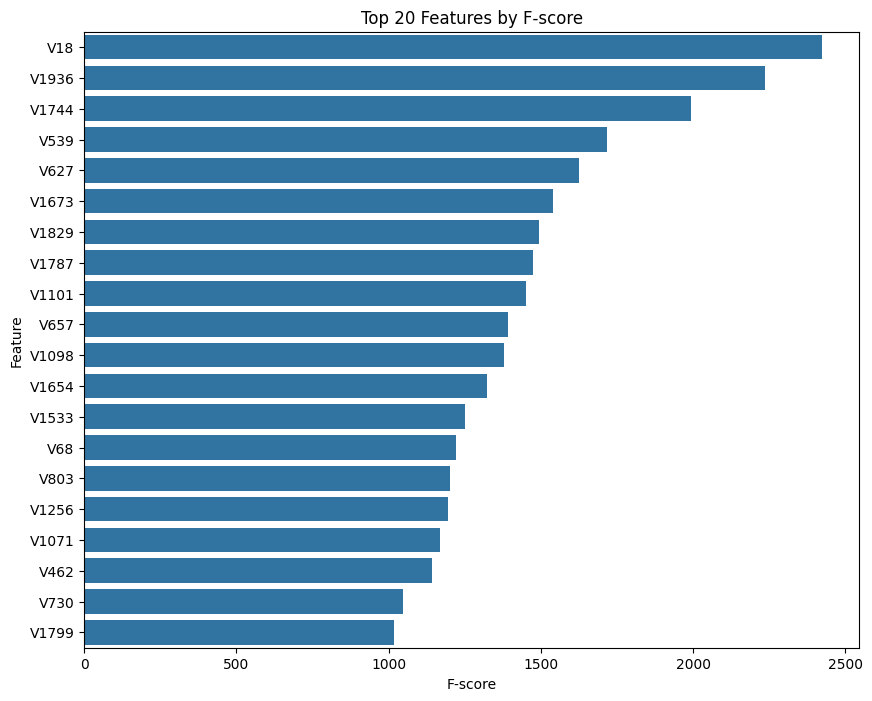

In [19]:
import seaborn as sns

# Plotting the top 20 features
top_n = 20
top_features = sorted_features.head(top_n)

plt.figure(figsize=(10, 8))
sns.barplot(x='F-score', y='Feature', data=top_features)
plt.title('Top 20 Features by F-score')
plt.xlabel('F-score')
plt.ylabel('Feature')

# directory
output_dir = 'plot_output'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)


# Save the plot as a file
plot_filename = os.path.join(output_dir, f"Top_20_feat_plot.png")
plt.savefig(plot_filename)
print(f"Plot saved to {plot_filename}")
plt.show()
plt.close()


Plot saved to plot_output/Fscore_vs_P.png


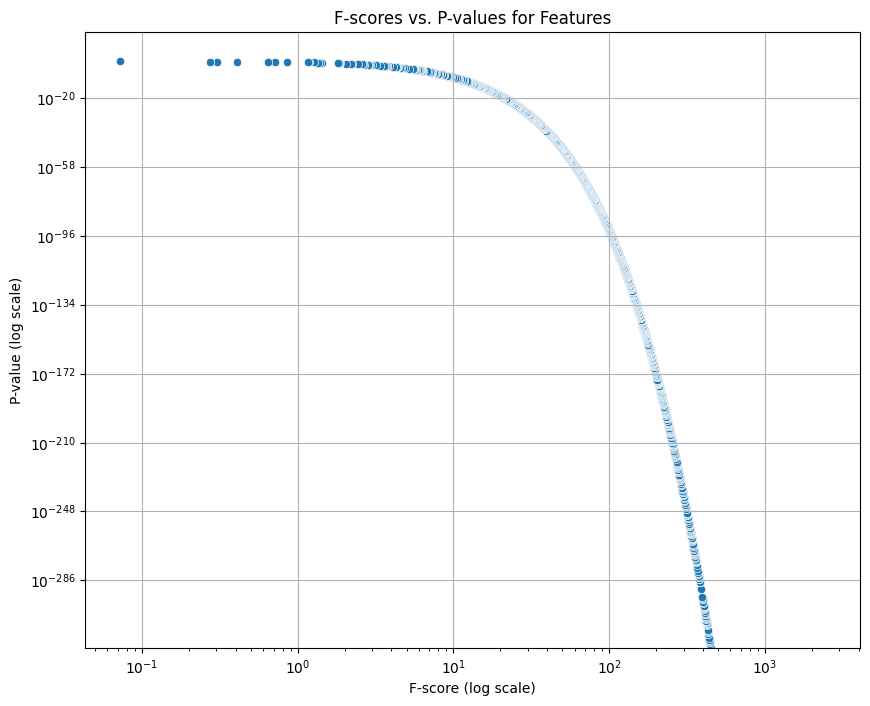

In [20]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='F-score', y='P-value', data=sorted_features)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('F-score (log scale)')
plt.ylabel('P-value (log scale)')
plt.title('F-scores vs. P-values for Features')
plt.grid(True)

# Save the plot as a file
plot_filename = os.path.join(output_dir, f"Fscore_vs_P.png")
plt.savefig(plot_filename)
print(f"Plot saved to {plot_filename}")
plt.show()
plt.close()

/home/mk/my-jupyter-env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Plot saved to plot_output/3D_feat_fscore_p.png


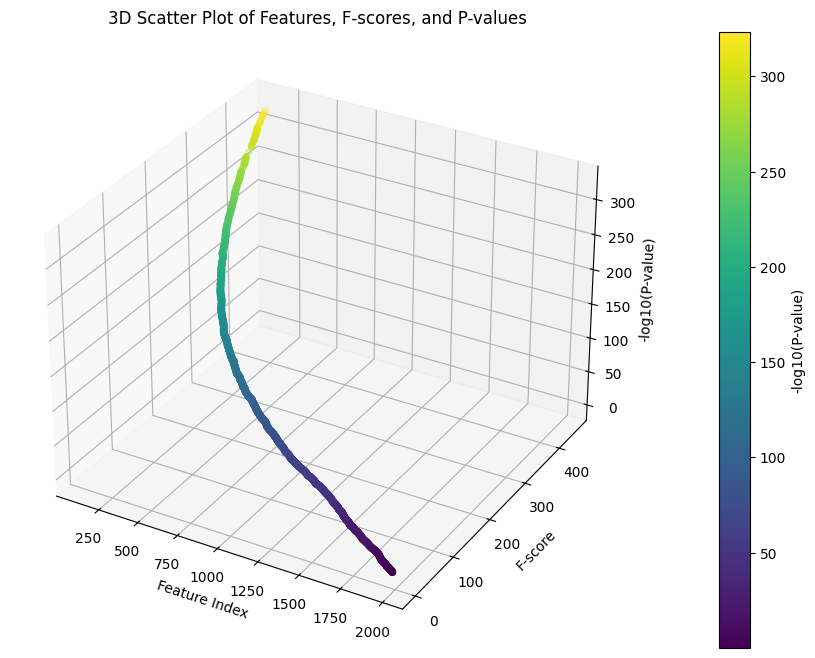

In [21]:
from mpl_toolkits.mplot3d import Axes3D

# Using Sorted Features
features = range(len(sorted_features)) 
fscores = sorted_features['F-score']
pvalues = -np.log10(sorted_features['P-value'])

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(features, fscores, pvalues, c=pvalues, cmap='viridis', marker='o')

# Labels and title
ax.set_xlabel('Feature Index')
ax.set_ylabel('F-score')
ax.set_zlabel('-log10(P-value)')
ax.set_title('3D Scatter Plot of Features, F-scores, and P-values')

# Color bar
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('-log10(P-value)')

# Save the plot as a file
plot_filename = os.path.join(output_dir, f"3D_feat_fscore_p.png")
plt.savefig(plot_filename)
print(f"Plot saved to {plot_filename}")
plt.show()
plt.close()